Video lecture is available on https://www.youtube.com/watch?v=D-taRpi4OJk&list=PL3N9eeOlCrP6zMkHMxFJV4yXIsET5aWlc&index=11

In [1]:
!pip install autoviml

     |████████████████████████████████| 133kB 8.5MB/s 
     |████████████████████████████████| 22.3MB 77.3MB/s 
     |████████████████████████████████| 133kB 50.1MB/s 
     |████████████████████████████████| 157.5MB 77kB/s 
     |████████████████████████████████| 133kB 55.8MB/s 
     |████████████████████████████████| 215kB 61.1MB/s 
     |████████████████████████████████| 358kB 52.3MB/s 
     |████████████████████████████████| 67.3MB 44kB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491626 sha256=28850761c361b98cd2d3ca9d64d73739326552ea0438c403d91c1bcdc9bdea4d
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled

In [2]:
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd

In [3]:
dataset, info = tfds.load('amazon_us_reviews/Personal_Care_Appliances_v1_00', with_info=True, batch_size=-1)
train_dataset = dataset['train']

Shuffling and writing examples to /root/tensorflow_datasets/amazon_us_reviews/Personal_Care_Appliances_v1_00/0.1.0.incompleteF1PUSO/amazon_us_reviews-train.tfrecord


Dataset amazon_us_reviews downloaded and prepared to /root/tensorflow_datasets/amazon_us_reviews/Personal_Care_Appliances_v1_00/0.1.0. Subsequent calls will reuse this data.


In [4]:
info

tfds.core.DatasetInfo(
    name='amazon_us_reviews',
    version=0.1.0,
    description='Amazon Customer Reviews (a.k.a. Product Reviews) is one of Amazons iconic products. In a period of over two decades since the first review in 1995, millions of Amazon customers have contributed over a hundred million reviews to express opinions and describe their experiences regarding products on the Amazon.com website. This makes Amazon Customer Reviews a rich source of information for academic researchers in the fields of Natural Language Processing (NLP), Information Retrieval (IR), and Machine Learning (ML), amongst others. Accordingly, we are releasing this data to further research in multiple disciplines related to understanding customer product experiences. Specifically, this dataset was constructed to represent a sample of customer evaluations and opinions, variation in the perception of a product across geographical regions, and promotional intent or bias in reviews.

Over 130+ million cus

In [5]:
dataset=tfds.as_numpy(train_dataset)

In [6]:
dataset

{'data': {'customer_id': array([b'13986323', b'50574716', b'50593972', ..., b'40719682',
         b'35596948', b'29430209'], dtype=object),
  'helpful_votes': array([0, 3, 0, ..., 0, 0, 0], dtype=int32),
  'marketplace': array([b'US', b'US', b'US', ..., b'US', b'US', b'US'], dtype=object),
  'product_category': array([b'Personal_Care_Appliances', b'Personal_Care_Appliances',
         b'Personal_Care_Appliances', ..., b'Personal_Care_Appliances',
         b'Personal_Care_Appliances', b'Personal_Care_Appliances'],
        dtype=object),
  'product_id': array([b'B00847JQZ6', b'B00N5HD340', b'B0077L1X24', ..., b'B000UZ8X2W',
         b'B000NURPPK', b'B001EY5GNW'], dtype=object),
  'product_parent': array([b'997683625', b'955577225', b'120764066', ..., b'96066145',
         b'58591097', b'986877728'], dtype=object),
  'product_title': array([b'SE - Reading Glass - Spring Loaded Hinges, 4.0x - RTS62400',
         b'Straight Razor',
         b'Philips Sonicare Flexcare & Healthy White Plastic

In [7]:
helpful_votes=dataset['data']['helpful_votes']
review_headline=dataset['data']['review_headline']
review_body=dataset['data']['review_body']
rating=dataset['data']['star_rating']

In [8]:
reviews_df=pd.DataFrame(np.hstack((helpful_votes[:,None],review_headline[:,None],review_body[:,None],rating[:,None])),columns=['votes','headline','reviews','rating'])

In [9]:
convert_dict = {'votes': int, 
                'headline': str,
                'reviews': str,
                'rating': int
               } 

In [10]:
reviews_df = reviews_df.astype(convert_dict) 

In [11]:
reviews_df

,votes,headline,reviews,rating
0,0,b'These glasses are an excellent value. The fi...,"b""These glasses are an excellent value. The f...",4
1,3,b'A fantastic way to cheaply try straight razo...,"b""Always wanted to try straight razor shaving ...",5
2,0,b'Great for travel',b'I usually either throw my toothbrush in a pl...,4
3,0,b'Five Stars',b'Top quality.',5
4,1,b'*Product sent not as shown',"b'Today I received 1 Fl. Oz, Natures Balance ...",3
...,...,...,...,...
85976,2,b'YES!',"b""This is the real deal. Don't bother with the...",5
85977,1,b'Bryton Picks',b'I like the Bryton Picks very much. Have orde...,5
85978,0,b'Trimmer Not Working',"b""I have had a Remington before but needed a n...",3
85979,0,b'Loud and ineffectual',"b""I was surprised that it really didn't do muc...",2


In [12]:
reviews_df["target"] = reviews_df["rating"].apply(lambda x: 1 if x>= 4 else 0) 

In [13]:
reviews_df

,votes,headline,reviews,rating,target
0,0,b'These glasses are an excellent value. The fi...,"b""These glasses are an excellent value. The f...",4,1
1,3,b'A fantastic way to cheaply try straight razo...,"b""Always wanted to try straight razor shaving ...",5,1
2,0,b'Great for travel',b'I usually either throw my toothbrush in a pl...,4,1
3,0,b'Five Stars',b'Top quality.',5,1
4,1,b'*Product sent not as shown',"b'Today I received 1 Fl. Oz, Natures Balance ...",3,0
...,...,...,...,...,...
85976,2,b'YES!',"b""This is the real deal. Don't bother with the...",5,1
85977,1,b'Bryton Picks',b'I like the Bryton Picks very much. Have orde...,5,1
85978,0,b'Trimmer Not Working',"b""I have had a Remington before but needed a n...",3,0
85979,0,b'Loud and ineffectual',"b""I was surprised that it really didn't do muc...",2,0


In [14]:
reviews_df.shape[0]

85981

In [15]:
reviews_df["target"].value_counts()

1    62554
0    23427
Name: target, dtype: int64

In [16]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85981 entries, 0 to 85980
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   votes     85981 non-null  int64 
 1   headline  85981 non-null  object
 2   reviews   85981 non-null  object
 3   rating    85981 non-null  int64 
 4   target    85981 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 3.3+ MB


In [17]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(reviews_df, test_size=0.25)

In [18]:
from autoviml.Auto_NLP import Auto_NLP

Imported Auto_ViML version: 0.1.680. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            
Now Auto_ViML can solve multi-label, multi-output problems. Also Auto_NLP included.
To get the latest version, perform "pip install autoviml --no-cache-dir --ignore-installed"


Imported Auto_NLP version: 0.0.45.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

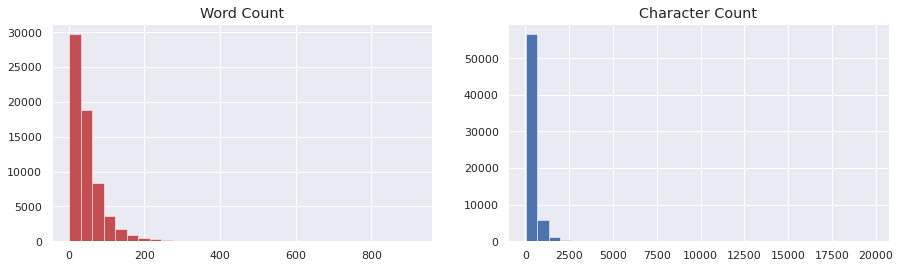

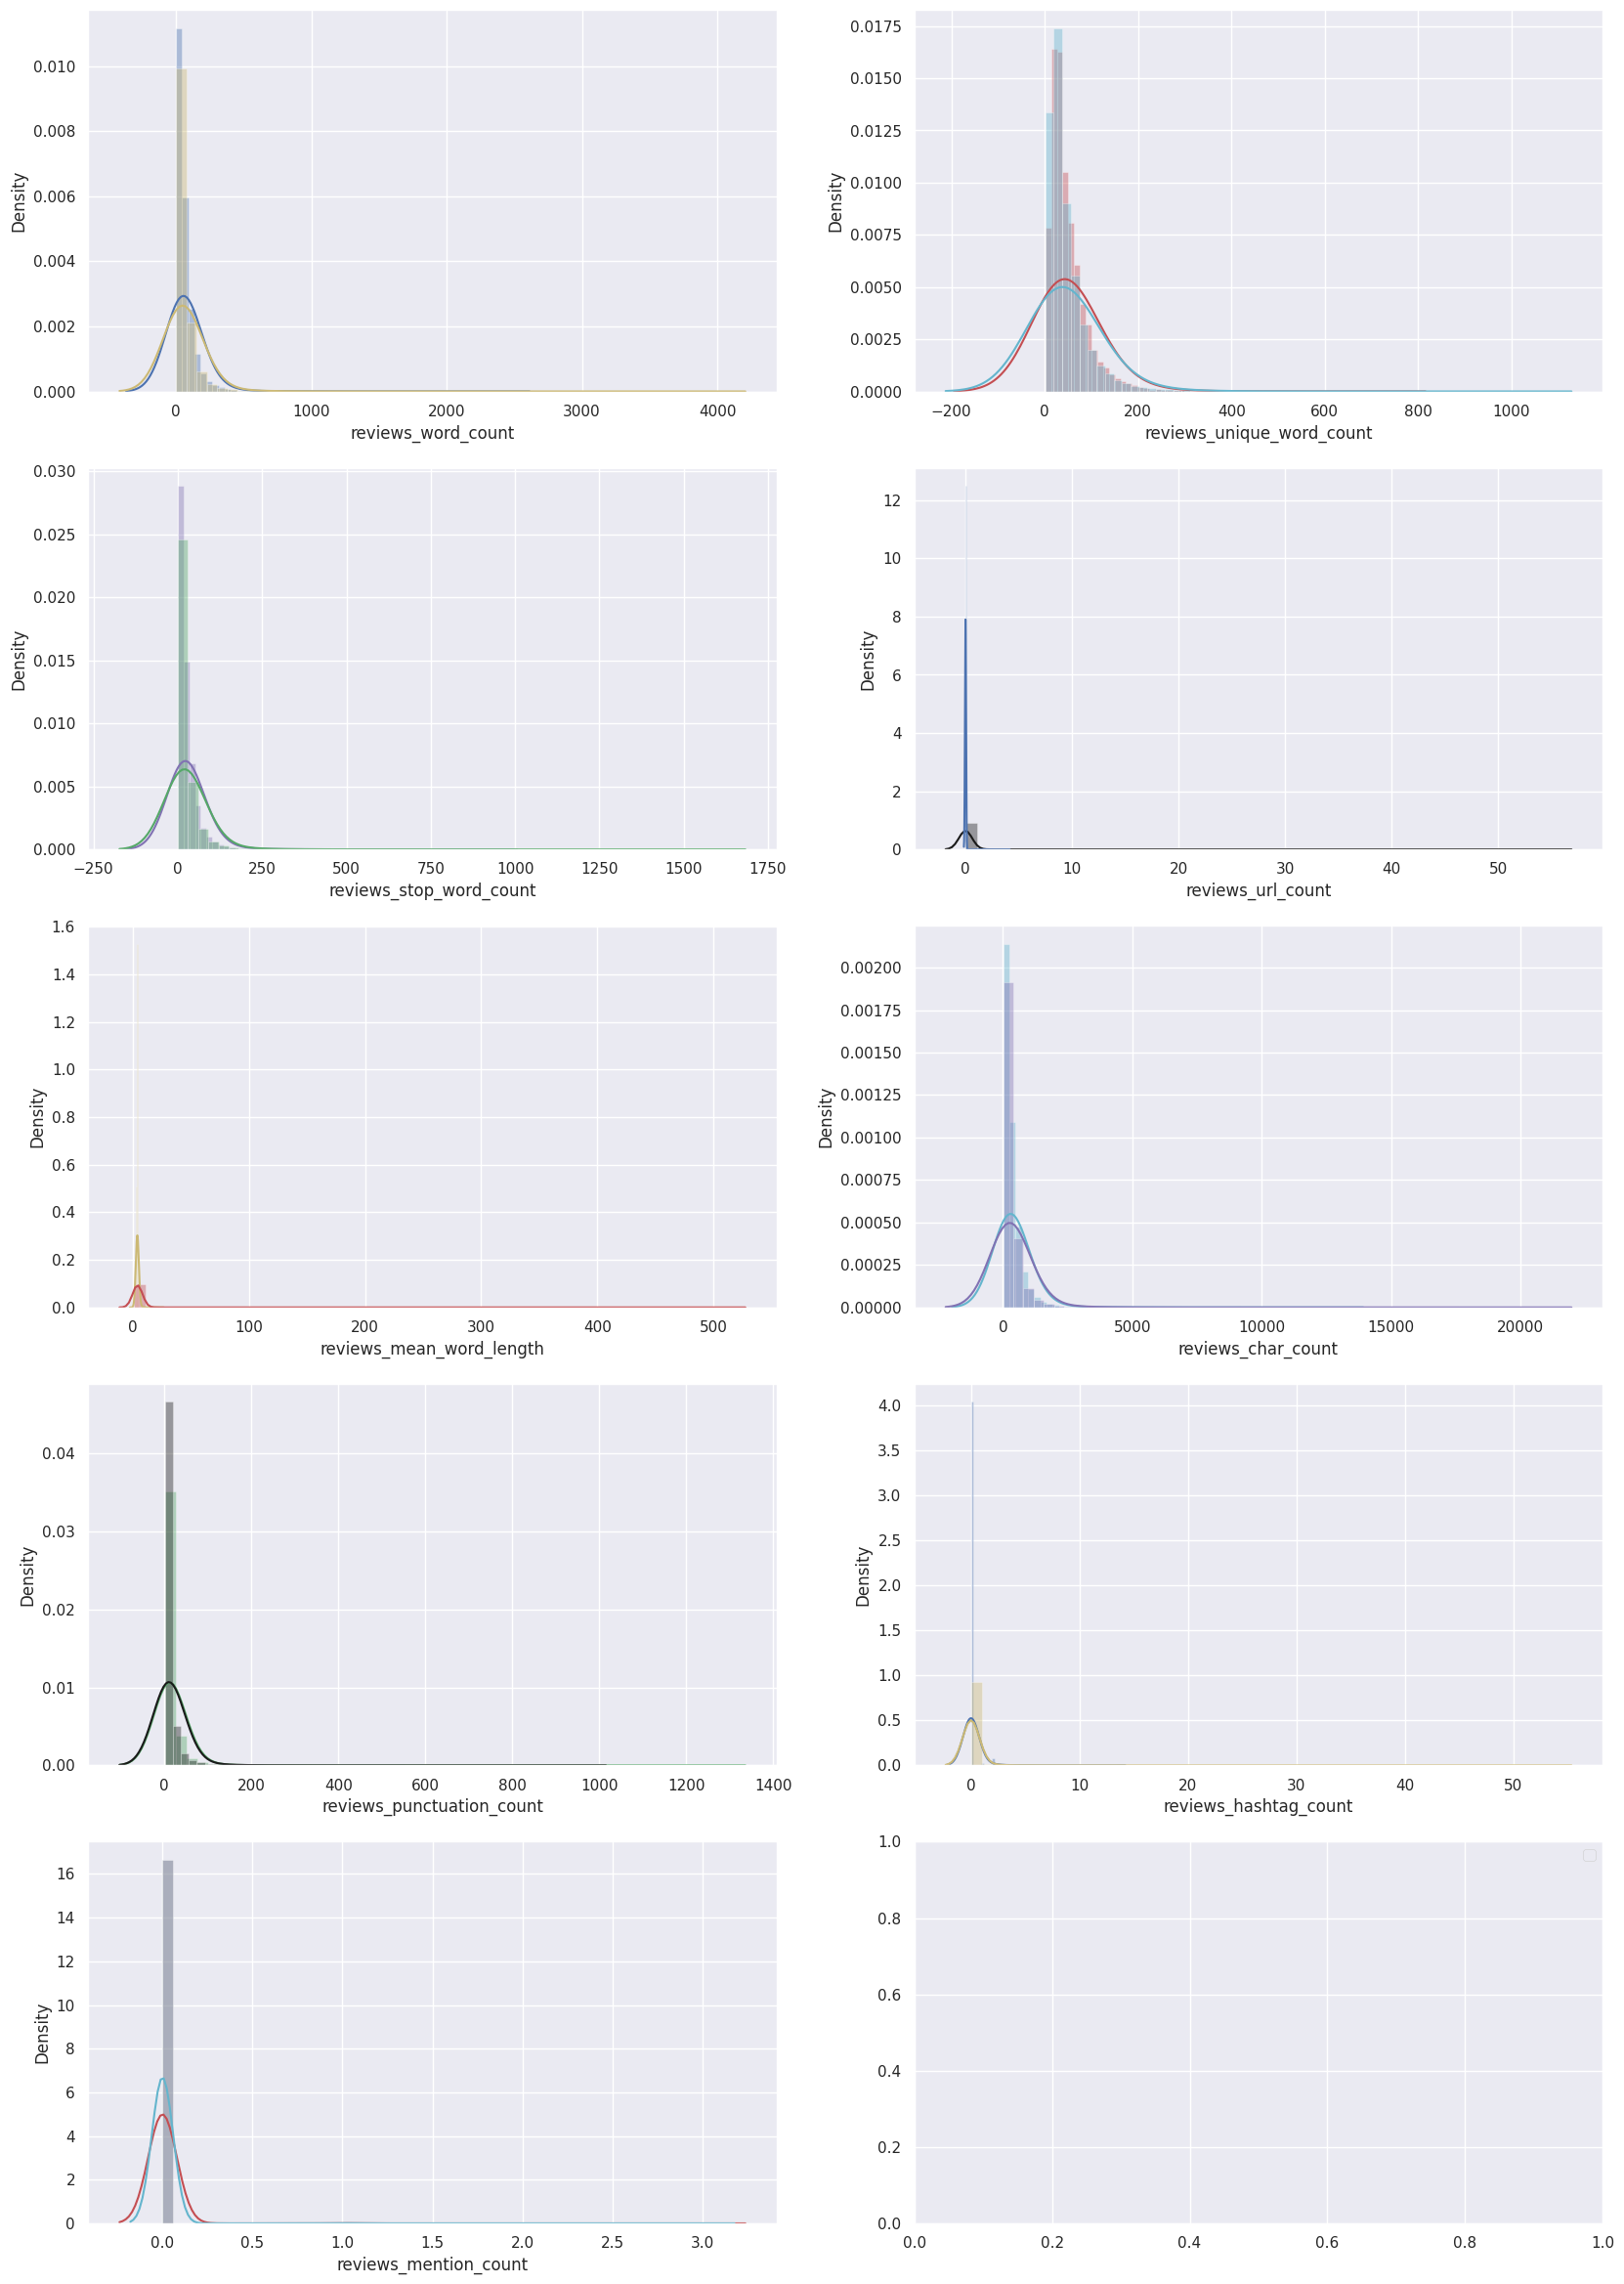

    Added 9 summary columns for counts of words and characters in each row
Cleaning text in Train data for reviews column
    Faster text processing using clean_text function, since top_num_features is below 300
    Time Taken for Expanding emojis and abbreviations in data = 99 seconds
        Time Taken for Processing text in data = 260 seconds
Train data Text cleaning completed. Time taken = 381 seconds

For target = target

    For class = 0
Top 200 n-grams
: ['do', 'but', 'work', 'use', 'product', 'good', 'would', 'buy', 'they', 'if', 'will', 'like', 'me', 'time', 'when', 'make', 'no', 'well', 'what', 'after', 'money', 'your', 'try', 'these', 'back', 'really', 'even', 'think', 'them', 'off', 'because', 'much', 'go', 'look', 'return', 'great', 'take', 'give', 'could', 'come', 'purchase', 'item', 'need', 'break', 'there', 'first', 'week', 'which', 'find', 'waste', 'also', 'seem', 'order', 'day', 'as', 'small', 'price', 'hard', 'thing', 'little', 'quality', 'way', 'bad', 'want', 'fit'

In [ ]:
nlp_column = 'reviews'
target = 'target'
train_nlp, test_nlp, nlp_transformer, preds = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=50, verbose=2,
                build_model=True)

In [ ]:
nlp_transformer

In [ ]:
nlp_transformer.predict(test[nlp_column])

In [ ]:
nlp_transformer.

-------------------------------------------